In [29]:
# Add Matplotlib inline magic command
%matplotlib inline

In [30]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import statistics

In [31]:
# CSV files (city_data)
PyBer_city_data = os.path.join('..', 'PyBer_Analysis', 'Resources', 'city_data.csv')
city_data_df = pd.read_csv(PyBer_city_data, encoding = "UTF-8")
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [32]:
# CSV files (city_data)
PyBer_ride_data = os.path.join('..', 'PyBer_Analysis', 'Resources', 'ride_data.csv')
ride_data_df = pd.read_csv(PyBer_ride_data, encoding = "UTF-8")
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,14/01/2019 10:14,13.83,5739410935873
1,South Michelleport,04/03/2019 18:24,30.24,2343912425577
2,Port Samanthamouth,24/02/2019 04:29,33.44,2005065760003
3,Rodneyfort,10/02/2019 23:22,23.44,5149245426178
4,South Jack,06/03/2019 04:28,34.58,3908451377344
5,South Latoya,11/03/2019 12:26,9.52,1994999424437
6,New Paulville,27/02/2019 11:17,43.25,793208410091
7,Simpsonburgh,26/04/2019 00:43,35.98,111953927754
8,South Karenland,08/01/2019 03:28,35.09,7995623208694
9,North Jasmine,09/03/2019 06:26,42.81,5327642267789


# Inspecting the data in both files

In [33]:
## Inspect the city_data 

# Check for null values
city_data_df.isnull()
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [34]:
# Check if driver_count column has an integer data type
city_data_df['driver_count']
city_data_df.count()

city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [35]:
# Find out how many data points there are for each type of city
type_city_count = city_data_df.groupby(by = "type").count()
type_city_count.loc[:,["driver_count"]].sort_values("driver_count")

,driver_count
type,
Rural,18
Suburban,36
Urban,66


In [36]:
## Inspect the ride_data 

# Get all the rows that contain null values
ride_data_df.isnull()
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [37]:
# Make sure the fare and ride_id columns are numerical data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

# Merge DataFrames

In [38]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,14/01/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,04/03/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,24/02/2019 04:29,33.44,2005065760003,57,Urban
3,Rodneyfort,10/02/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,06/03/2019 04:28,34.58,3908451377344,46,Urban


# Create Bubble Chart

In [ ]:
## Create a DataFrame for each city type

In [46]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,14/01/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,04/03/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,24/02/2019 04:29,33.44,2005065760003,57,Urban
3,Rodneyfort,10/02/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,06/03/2019 04:28,34.58,3908451377344,46,Urban


In [47]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,13/04/2019 11:13,43.22,1076079536213,9,Rural
2251,North Holly,02/02/2019 14:54,12.42,1985256326182,8,Rural
2252,Michaelberg,27/03/2019 18:27,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,23/02/2019 21:12,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,06/05/2019 08:57,51.80,4018025271936,2,Rural


In [48]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,27/01/2019 03:08,27.79,6653622887913,11,Suburban
1626,East Kentstad,07/04/2019 19:44,18.75,6575961095852,20,Suburban
1627,Lake Omar,17/01/2019 21:33,21.71,966911700371,22,Suburban
1628,Myersshire,27/02/2019 17:38,17.10,5706770909868,19,Suburban
1629,West Hannah,19/04/2019 01:06,37.78,2273047151891,12,Suburban


In [ ]:
## Total number of rides for each city type

In [49]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(by ="city").count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [50]:
# Get the number of rides for rural cities.
rural_ride_count = rural_cities_df.groupby(by ="city").count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [51]:
# Get the number of rides for suburban cities.
suburban_ride_count = suburban_cities_df.groupby(by ="city").count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [ ]:
## Average fare for ecah city type

In [54]:
# Find the average fare for urban cities
avg_urban_fare = urban_cities_df.groupby(by = "city").mean()["fare"]
avg_urban_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [55]:
# Find the average fare for rural cities
avg_rural_fare = rural_cities_df.groupby(by = "city").mean()["fare"]
avg_rural_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [56]:
# Find the average fare for suburban cities
avg_suburban_fare = suburban_cities_df.groupby(by = "city").mean()["fare"]
avg_suburban_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [ ]:
## Get the average number of drivers for each city

In [57]:
# Get the total number of rides for urban 
urban_driver_count = urban_cities_df.groupby(by = "city").mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [58]:
# Get the total number of rides for rural 
rural_driver_count = rural_cities_df.groupby(by = "city").mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [59]:
# Get the total number of rides for suburban 
suburban_driver_count = suburban_cities_df.groupby(by = "city").mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [ ]:
## Create the scatter plots for each type of city

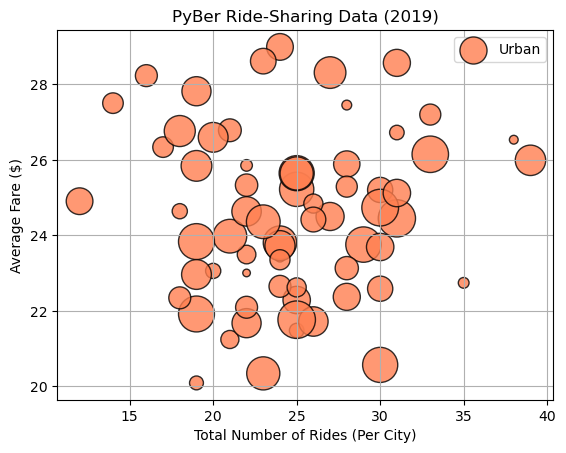

In [71]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, avg_urban_fare, s=10*urban_driver_count, alpha=0.80, color="coral", edgecolors= "black", linewidth=1, label= "Urban")

# Add title and axis labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

# Add grid
plt.grid(True)

# Add legend
plt.legend()

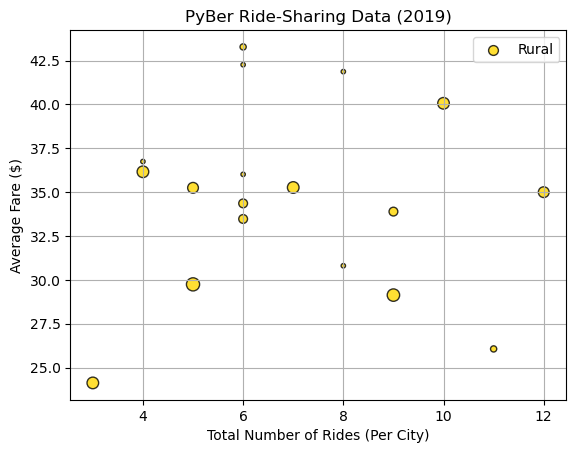

In [74]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count, avg_rural_fare, s=10*rural_driver_count, alpha=0.80, color="gold", edgecolors= "black", linewidth=1, label= "Rural")

# Add title and axis labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

# Add grid
plt.grid(True)

# Add legend
plt.legend()

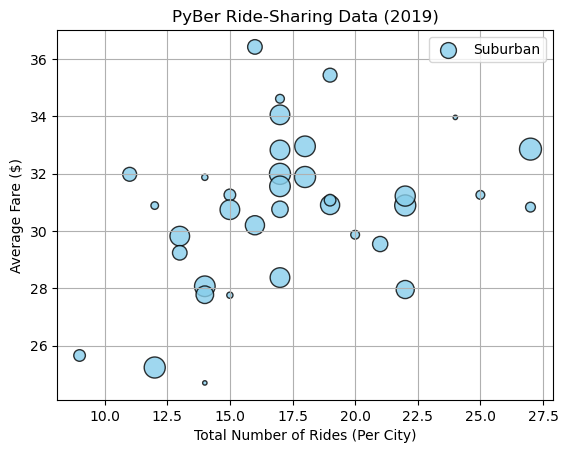

In [76]:
# Build the scatter plots for rural cities.
plt.scatter(suburban_ride_count, avg_suburban_fare, s=10*suburban_driver_count, alpha=0.80, color="skyblue", edgecolors= "black", linewidth=1, label= "Suburban")

# Add title and axis labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

# Add grid
plt.grid(True)

# Add legend
plt.legend()

In [ ]:
## Create a bubble chart for all cities (combine these three charts into one chart)

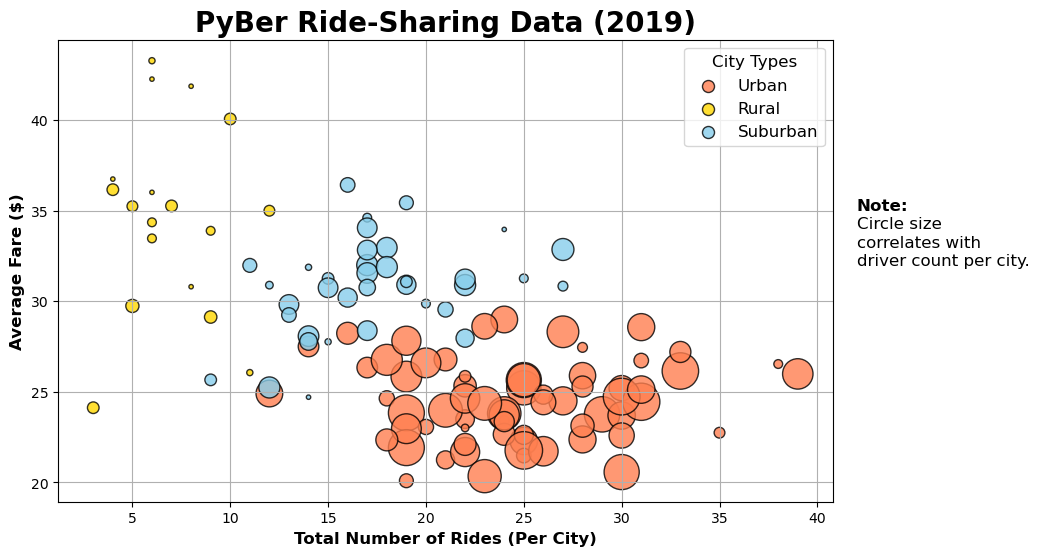

In [101]:
# Add the scatter charts for each type of city
plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count, avg_urban_fare, s=10*urban_driver_count, alpha=0.80, color="coral", edgecolors= "black", linewidth=1, label= "Urban")

plt.scatter(rural_ride_count, avg_rural_fare, s=10*rural_driver_count, alpha=0.80, color="gold", edgecolors= "black", linewidth=1, label= "Rural")

plt.scatter(suburban_ride_count, avg_suburban_fare, s=10*suburban_driver_count, alpha=0.80, color="skyblue", edgecolors= "black", linewidth=1, label= "Suburban")


# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20, weight='bold')
plt.ylabel("Average Fare ($)", fontsize=12, weight='bold')
plt.xlabel("Total Number of Rides (Per City)", fontsize=12, weight='bold')
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note:", fontsize="12", weight='bold')
plt.text(42, 34, "Circle size", fontsize="12")
plt.text(42, 33, "correlates with", fontsize="12")
plt.text(42, 32, "driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("Analysis/Fig1.png")

# Show the plot
plt.show()